## HOMEWORK WEEK 4 

In [110]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [111]:
#data = !curl https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

In [112]:
import wget
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'
wget.download(url)

'CreditScoring (3).csv'

### Preparation

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started


In [113]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [114]:
df.head(3)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985


In [115]:
df.shape

(4455, 14)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [117]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [118]:
df.head(2)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658


Prepare the numerical variables:

In [119]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [120]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [121]:
df.shape

(4454, 14)

Create the target variable

In [122]:
df.status.unique()

array(['ok', 'default'], dtype=object)

In [123]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [124]:
df.head(3)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1


### Your code

What are the categorical variables? What are the numerical?

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


In [126]:
cat_columns = list(df.select_dtypes(include='object').columns)
cat_columns

['home', 'marital', 'records', 'job']

In [127]:
numerical_columns = list(df.select_dtypes(exclude='object').columns)
numerical_columns

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

**Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1**

In [128]:
#full train and test dataset
df_full_train,df_test =  train_test_split(df,test_size=0.20,random_state=1)

In [129]:
# train and validation dataset
df_train,df_val =  train_test_split(df_full_train,test_size=0.25,random_state=1)

### Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the "default" variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [130]:
numerical_columns

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

In [131]:
from sklearn.metrics import roc_auc_score

In [132]:
df_train['seniority'].unique()

array([12,  4,  0,  6, 13,  5, 10, 16, 30,  2, 17, 25,  1,  7,  3, 21,  8,
       15,  9, 11, 18, 20, 26, 14, 39, 28, 22, 29, 24, 19, 40, 23, 38, 34,
       32, 35, 36, 45, 31, 27, 47, 42, 37, 43, 48, 41], dtype=int64)

In [133]:
for col in numerical_columns:
    print(col,roc_auc_score(df_train['default'],df_train[col]))

seniority 0.2906221375508058
time 0.5608662489595051
age 0.4267066727500061
expenses 0.4990815782782989
income 0.31799333386736695
assets 0.35139574328771983
debt 0.49521703242164505
amount 0.5910773431595518
price 0.5043329862114843
default 1.0


Which numerical variable (among the following 4) has the highest AUC?

seniority
time
income
debt

Ans time 

### Training the model

From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [134]:
select_cols = ['seniority', 'income', 'assets', 'records', 'job', 'home']
#assigning X and y from dataframe

X_train = df_train.drop('default',axis=1)
y_train = df_train['default']

In [135]:
X_train = X_train[select_cols]

In [136]:
#val dataset
X_val = df_val.drop('default',axis=1)
y_val = df_val['default']
X_val = X_val[select_cols]

In [137]:
#test dataset
X_test = df_test.drop('default',axis=1)
y_test = df_test['default']
X_test = X_test[select_cols]

In [138]:
#look at shape post splitting of full train
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((2672, 6), (2672,), (891, 6), (891,), (891, 6), (891,))

In [139]:
X_train.head(3)

,seniority,income,assets,records,job,home
1877,12,102,0,no,fixed,private
1803,4,143,0,no,fixed,other
3400,0,295,6000,no,fixed,owner


In [140]:
#applying ohe using dict vectorizer
# we will use DictVectorizer() for onehot encoding of cat columns
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [141]:
train_dicts = X_train.to_dict(orient='records') #convert train data to dict

In [142]:
X_train_encoded = dv.fit_transform(train_dicts) #fit and transform Dictvectorizer on train data

In [143]:
dv.get_feature_names()

['assets',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'records=no',
 'records=yes',
 'seniority']

In [144]:
#using ohe on val dataset
val_dicts =  X_val.to_dict(orient='records')
X_val_encoded = dv.transform(val_dicts)

In [145]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [146]:
model.fit(X_train_encoded,y_train) #train the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

And 0.812

In [147]:
predictions = model.predict_proba(X_val_encoded)[:, 1]

In [148]:
print('AUC ROC Score on validation dataset',round(roc_auc_score(y_val,predictions),3))

AUC ROC Score on validation dataset 0.812


### Question 3

Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

For each threshold, compute precision and recall

Plot them

In [149]:
# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val,predictions)

In [150]:
len(precision),len(recall),len(thresholds)

(854, 854, 853)

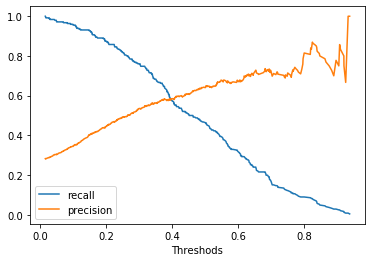

In [151]:
import matplotlib.pyplot as plt
plt.plot(thresholds,recall[:-1],label='recall')
plt.plot(thresholds,precision[:-1],label='precision')
plt.xlabel('Threshods')
plt.legend()
plt.show()

At which threshold precision and recall curves intersect?

0.2
0.4
0.6
0.8

Ans 0.4

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$
Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [152]:
threholds_values =[]
f1_score =[]
for element in zip(precision,recall,thresholds):
    
    threholds_values.append(element[2])
    f1 = (2*(element[0]*element[1]))/(element[0]+element[1])
    f1_score.append(f1)
    

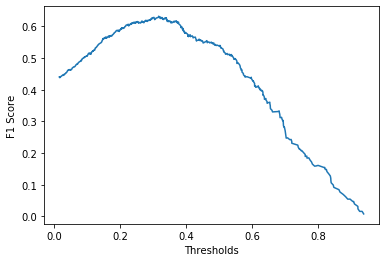

In [153]:
plt.plot(threholds_values,f1_score)
plt.xlabel('Thresholds')
plt.ylabel('F1 Score')
plt.show()

At which threshold F1 is maximal?

0.1
0.3
0.5
0.7

Ans 0.3

### Question 5

Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train

Split the data into train and validation

Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

Use AUC to evaluate the model on validation

In [154]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [158]:
scores =[]
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
for train_idx,val_idx in (kfold.split(df_full_train)):
    df_train_fold = df_full_train.iloc[train_idx]
    df_val_fold = df_full_train.iloc[val_idx]
    X_train_fold = df_train_fold.drop('default',axis=1)
    X_train_fold = X_train_fold[select_cols]
    y_train_fold = df_train_fold['default']
    X_val_fold = df_val_fold.drop('default',axis=1)
    X_val_fold = X_val_fold[select_cols]
    y_val_fold = df_val_fold['default']
    train_dicts_fold = X_train_fold.to_dict(orient='records') #convert train data to dict
    X_train_encoded_fold = dv.fit_transform(train_dicts_fold) #fit and transform Dictvectorizer on train data
    val_dicts_fold =  X_val_fold.to_dict(orient='records')
    X_val_encoded_fold = dv.transform(val_dicts_fold)
    
    model.fit(X_train_encoded_fold,y_train_fold)
    predictions_fold = model.predict_proba(X_val_encoded_fold)[:, 1]
    scores.append(round(roc_auc_score(y_val_fold,predictions_fold),3))
    print('AUC ROC Score on validation dataset',round(roc_auc_score(y_val_fold,predictions_fold),3))

AUC ROC Score on validation dataset 0.826
AUC ROC Score on validation dataset 0.825
AUC ROC Score on validation dataset 0.789
AUC ROC Score on validation dataset 0.825
AUC ROC Score on validation dataset 0.805


How large is standard devidation of the scores across different folds?

0.001
0.014
0.09
0.14

Ans 0.014

In [159]:
np.std(scores)

0.014778362561528894

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]

Initialize KFold with the same parameters as previously

Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)

Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [168]:
c_values = [0.01, 0.1, 1, 10]
for c in c_values:
    scores =[]
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    for train_idx,val_idx in (kfold.split(df_full_train)):
        df_train_fold_2 = df_full_train.iloc[train_idx]
        df_val_fold_2 = df_full_train.iloc[val_idx]
        X_train_fold_2 = df_train_fold_2.drop('default',axis=1)
        X_train_fold_2 = X_train_fold_2[select_cols]
        y_train_fold_2 = df_train_fold_2['default']
        X_val_fold_2 = df_val_fold_2.drop('default',axis=1)
        X_val_fold_2 = X_val_fold_2[select_cols]
        y_val_fold_2 = df_val_fold_2['default']
        train_dicts_fold_2 = X_train_fold_2.to_dict(orient='records') #convert train data to dict
        X_train_encoded_fold_2 = dv.fit_transform(train_dicts_fold_2) #fit and transform Dictvectorizer on train data
        val_dicts_fold_2 =  X_val_fold_2.to_dict(orient='records')
        X_val_encoded_fold_2 = dv.transform(val_dicts_fold_2)
    
        model.fit(X_train_encoded_fold-2,y_train_fold)
        predictions_fold_2 = model.predict_proba(X_val_encoded_fold_2)[:, 1]
        scores.append(roc_auc_score(y_val_fold_2,predictions_fold_2))
    print(f'Mean and Std Dev of scores for {c} is {round(np.mean(scores),3)} and {round(np.std(scores),3)} ' )

Mean and Std Dev of scores for 0.01 is 0.807 and 0.013 
Mean and Std Dev of scores for 0.1 is 0.813 and 0.014 
Mean and Std Dev of scores for 1 is 0.813 and 0.014 
Mean and Std Dev of scores for 10 is 0.813 and 0.014 


Which C leads to the best mean score?

0.01
0.1
1
10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

Ans 0.1